# Polynomial Regression With MDL

![](https://www.oreilly.com/library/view/hands-on-machine-learning/9781491962282/assets/mlst_04in03.png)

In this notebook we show how to learn the parameters and structure of polynomial regression models using MDL.

In [ ]:
#@markdown Install dependencies...

!pip install sklearn >/dev/null

import numpy as np

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 

## 1. Polynomial Regression Models

### 1.1. Coding

An $n$th order polynomial can be unambiguously described using $n$ floating-point coefficients. We use a simple concatenative code to represent this information:


#### $$ C_M(M) = C_M(n,d,c_1,\dots,c_n) = C_U(d)\,||\,C_F(c_1)\,||\,\dots\,||\,C_F(c_n)$$ 

where:

* $c_1,\dots,c_n$ are the polynomial coefficients.
* $d$ is the precision of each coefficient.
* $C_U$ is a uniform binary code for unsigned integers.
* $C_F$ is a uniform binary code for floating-point numbers.

Then the model description length is given by

 $$L_M(M) = L_{N}(d) + nd$$

Let $d \in [0, 2^k)$.

Then $L_N(d) = k$ is constant, and we can safely exclude it from the description length, giving

#### $$L_M(M) = nd$$


Once a polynomial has been specified, we can represent the data in a residual form: $(x, \epsilon)$ such that $\epsilon_i \sim \mathcal{N}(0, \sigma)$. We quantize $\epsilon$ to $d$ bits so that it's possible to compute exact probabilities for each residual. Then we can compress $\epsilon$ via arithmetic coding. So the data description length is given by

#### $$L_{D|M}(x, \epsilon) = -\log p_{D|M}(\epsilon) = -\sum \log \Phi\left(\epsilon_i \pm 0.5 \times 2^{-d}\right)$$

> The probability of $\epsilon$ is the product of individual residual probabilities. This follows from the assumption that residuals are i.i.d. Also note that we exclude $L(x)$ as it's constant.

Then the complete description length is given by 

#### $$L_{M,D}(n,d,c_1,\dots,c_n,x,y) = nd -\sum_{i=1}^n \log \Phi\left[(M(x_i) - y_i) \pm 0.5 \times 2^{-d}\right]$$

### 1.2. Implementation

Let's implement polynomial regression models in Python, including a method to compute the description length.

In [ ]:
sigma = 4

In [ ]:
def relu(x):
  return x * (x > 0)

In [ ]:
# def quantize(number, bits):

#   digits = np.ceil(np.log10(2 ** bits)).astype(int)
#   trunc_num = np.abs(np.trunc(number)) + 0.0000001
#   # print(trunc_num)

#   len_whole = np.ceil(relu(np.log10(trunc_num)))

#   fraction = np.round(number / (10 ** len_whole), digits) 

#   return fraction * (10 ** len_whole)

In [ ]:
#@markdown 


class PolynomialRegressionModel:


  def __init__(self, order: int = 2, precision: int = 8):

    self.order = order
    self.precision = precision
    self.precision_base10 = np.ceil(np.log10(2 ** precision)).astype(int)
    self.preprocessor = PolynomialFeatures(order, include_bias=False)
    self.regressor = LinearRegression()
  

  def fit(self, x, y):

    x = self.preprocessor.fit_transform(x)
    self.regressor.fit(x, y)
  

  def predict(self, x):

    x = self.preprocessor.transform(x)
    return self.regressor.predict(x)
  

  def sample(self, x):

    return self.predict(x) + np.random.randn()
  

  def mdl(self, x, y):

    quantized_coefs = quantize(self.regressor.coef_, self.precision)
    quantized_intercept = quantize(self.regressor.intercept_, self.precision)

    x = self.preprocessor.transform(x)

    prediction = (x @ quantized_coefs.T) + quantized_intercept
    epsilon = prediction - y

    quantized_epsilon = quantize(epsilon, self.precision)
    #plusminus = 0.5 * (10 ** -self.precision_base10)

    plusminus = 0.0
    #print(plusminus)

    upper = quantized_epsilon + plusminus
    lower = quantized_epsilon - plusminus
    #epsilon = self.predict()


    return lower, upper


In [ ]:
def truth(x):
  return (x ** 2) - (3 * x)

In [ ]:
data = np.array([
    [x, truth(x) + np.random.randn()*sigma] for x in np.random.random(size=50)*10
])

In [ ]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
import seaborn as sns

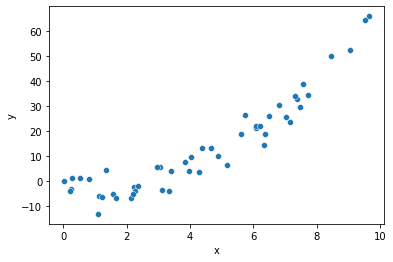

In [ ]:
sns.scatterplot(data=pd.DataFrame(data, columns=['x','y']), x='x', y='y', )

In [ ]:
a = PolynomialRegressionModel()

In [ ]:
x=np.transpose([data.T[0]])
y=np.transpose([data.T[1]])

In [ ]:
a.fit(x, y)

In [ ]:
a.mdl(x, y)

(array([[ 8.15 ],
        [-9.59 ],
        [ 0.356],
        [ 4.43 ],
        [ 2.66 ],
        [ 0.168],
        [ 0.553],
        [-3.93 ],
        [ 2.82 ],
        [-4.95 ],
        [-4.25 ],
        [ 2.26 ],
        [ 4.77 ],
        [ 2.84 ],
        [ 0.743],
        [ 1.43 ],
        [-5.63 ],
        [ 7.17 ],
        [-1.45 ],
        [-3.23 ],
        [ 0.328],
        [ 5.65 ],
        [ 4.08 ],
        [-6.36 ],
        [ 3.1  ],
        [-2.98 ],
        [-4.54 ],
        [-1.63 ],
        [-4.82 ],
        [ 3.82 ],
        [ 2.08 ],
        [-1.19 ],
        [-3.55 ],
        [-2.07 ],
        [-3.28 ],
        [ 6.1  ],
        [ 3.03 ],
        [-4.2  ],
        [-1.95 ],
        [-2.1  ],
        [ 2.57 ],
        [-2.25 ],
        [-7.45 ],
        [ 0.589],
        [-2.24 ],
        [ 3.72 ],
        [ 4.93 ],
        [-1.02 ],
        [-3.28 ],
        [ 9.9  ]]), array([[ 8.15 ],
        [-9.59 ],
        [ 0.356],
        [ 4.43 ],
        [ 2.66 ],
        [